#Final Project - Undergraduate
By: Mary Callicotte and Bryan White

##Goals
Our goal is to explore how different features affect the performace of machine learning. We will be using this [credit risk assessment dataset](https://archive.ics.uci.edu/ml/datasets/Credit+Approval) to explore how each feature affects the performace of a Random Forest Classifer.

In [6]:
# Task 0
# Global Variables
seed = 16112022

#Task 1: Upload dataset

In [7]:
#Task 1
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
nameArray = range(0, 16)
df = pd.read_csv(url, header=None, names=nameArray, na_values="?", index_col=False)
df = df.dropna()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


#Task 2: Prepare 5-fold Validation sets

In [8]:
# Task 2
# requires task 1


#convert data from strings
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df.columns:
        if df[column_name].dtype == object:
            df.loc[:, column_name] = le.fit_transform(df[column_name])
        else:
            pass

#does not use the cross validation method I found
labels = df[15]
labels =labels.replace("+", 1)
labels =labels.replace("-", 0)


features = df[range(0, 15)]

# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, summaryPrint = True, detailedPrint = False, _cv=5):
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
        This is the machine learning algorithm to be used for training.
    _X: array
        This is the matrix of features.
     _y: array
        This is the target variable.
    _cv: int, default=5
        Determines the number of folds for cross-validation.
    Returns
    -------
        The function returns a dictionary containing the metrics 'accuracy', 'precision',
        'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                            X=_X,
                            y=_y,
                            cv=_cv,
                            scoring=_scoring,
                            return_train_score=True)
      #using print because newlines looks nicer (you can undo this if you want)
    if (summaryPrint):
        print("\tMean Validation Accuracy:", results['test_accuracy'].mean(),
              "\n\t Max Validation Accuracy:", results['test_accuracy'].max(),
              "\n\n\tMean Validation Precision:", results['test_precision'].mean(),
              "\n\t Max Validation Precision:", results['test_precision'].max(),
              "\n\n\tMean Validation Recall:", results['test_recall'].mean(),
              "\n\t Max Validation Recall:", results['test_recall'].max(),
              "\n\n\tMean Validation F1 Score:", results['test_f1'].mean(),
              "\n\t Max Validation F1 Score:", results['test_f1'].max())
    
    if(detailedPrint):
        print("Training Accuracy scores: ", results['train_accuracy'],
              "\nMean Training Accuracy:", results['train_accuracy'].mean()*100,
              "\nTraining Precision scores:", results['train_precision'],
              "\nMean Training Precision:", results['train_precision'].mean(),
              "\nTraining Recall scores:", results['train_recall'],
              "\nMean Training Recall:", results['train_recall'].mean(),
              "\nTraining F1 scores:", results['train_f1'],
              "\nMean Training F1 Score:", results['train_f1'].mean(),
              "\nValidation Accuracy scores:", results['test_accuracy'],
              "\nMean Validation Accuracy:", results['test_accuracy'].mean()*100,
              "\nValidation Precision scores:", results['test_precision'],
              "\nMean Validation Precision:", results['test_precision'].mean(),
              "\nValidation Recall scores:", results['test_recall'],
              "\nMean Validation Recall:", results['test_recall'].mean(),
              "\nValidation F1 scores:", results['test_f1'],
              "\nMean Validation F1 Score:", results['test_f1'].mean())
      
    return {"Training Accuracy scores": results['train_accuracy'],
            "Mean Training Accuracy": results['train_accuracy'].mean()*100,
            "Training Precision scores": results['train_precision'],
            "Mean Training Precision": results['train_precision'].mean(),
            "Training Recall scores": results['train_recall'],
            "Mean Training Recall": results['train_recall'].mean(),
            "Training F1 scores": results['train_f1'],
            "Mean Training F1 Score": results['train_f1'].mean(),
            "Validation Accuracy scores": results['test_accuracy'],
            "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
            "Validation Precision scores": results['test_precision'],
            "Mean Validation Precision": results['test_precision'].mean(),
            "Validation Recall scores": results['test_recall'],
            "Mean Validation Recall": results['test_recall'].mean(),
            "Validation F1 scores": results['test_f1'],
            "Mean Validation F1 Score": results['test_f1'].mean()
            }

from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(random_state = seed)

#https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float
#You may not pass str to fit this kind of classifier.

#- = 0
#+ = 1
# labels =labels.replace("+", 1)
# labels =labels.replace("-", 0)

# #convert data from strings
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# for column_name in features.columns:
#         if features[column_name].dtype == object:
#             features.loc[:, column_name] = le.fit_transform(features[column_name])
#         else:
#             pass
#print(cross_validation(modelRFC, features, labels))
RFC_result= cross_validation(modelRFC, features, labels)

	Mean Validation Accuracy: 0.8544920728126835 
	 Max Validation Accuracy: 0.9694656488549618 

	Mean Validation Precision: 0.883855033855034 
	 Max Validation Precision: 0.9722222222222222 

	Mean Validation Recall: 0.8339201877934272 
	 Max Validation Recall: 0.9861111111111112 

	Mean Validation F1 Score: 0.8504231642414639 
	 Max Validation F1 Score: 0.9722222222222222


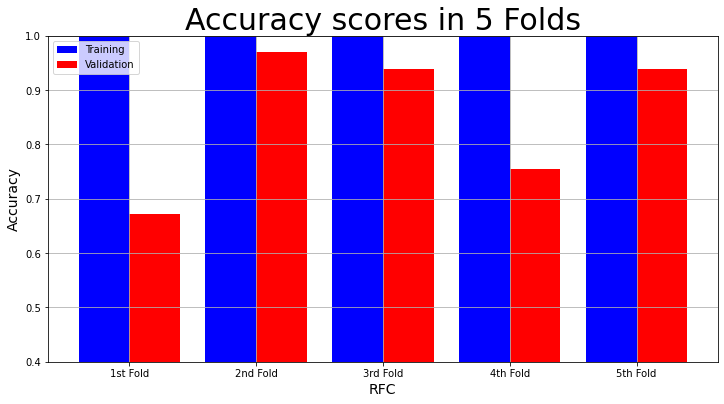

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()


model_name = "RFC"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            RFC_result["Training Accuracy scores"],
            RFC_result["Validation Accuracy scores"])



In [10]:
# try to make a lot of of them

features_list = []
for column_name1 in features.columns:
    for column_name2 in features.columns:
        features_list.append([column_name1, column_name2])

import numpy as np
meanOutput = np.empty((4, 15, 15))
maxOutput = np.empty((4, 15, 15))

for feature_names in features_list:
    currentFeatures = df[feature_names]
    modelRFC = RandomForestClassifier(random_state = seed)
    if (feature_names[1] == 14):
        print(feature_names)
    else:
        print(feature_names, end = ", ")
    RFCResult = cross_validation(modelRFC, currentFeatures, labels, False)
    meanOutput[0][feature_names[0]][feature_names[1]] = RFCResult['Validation Accuracy scores'].mean()
    meanOutput[1][feature_names[0]][feature_names[1]] = RFCResult['Validation Precision scores'].mean()
    meanOutput[2][feature_names[0]][feature_names[1]] = RFCResult['Validation Recall scores'].mean()
    meanOutput[3][feature_names[0]][feature_names[1]] = RFCResult['Validation F1 scores'].mean()

    maxOutput[0][feature_names[0]][feature_names[1]] = RFCResult['Validation Accuracy scores'].max()
    maxOutput[1][feature_names[0]][feature_names[1]] = RFCResult['Validation Precision scores'].max()
    maxOutput[2][feature_names[0]][feature_names[1]] = RFCResult['Validation Recall scores'].max()
    maxOutput[3][feature_names[0]][feature_names[1]] = RFCResult['Validation F1 scores'].max()


# for i in range(0,4):
#     print(meanOutput[i])
#     print(maxOutput[i], end="\n\n")

[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14]
[1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14]
[2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14]
[3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14]
[4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14]
[5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14]
[6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14]
[7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14]
[8, 0], 

In [ ]:
# get the info out of the big arrays
meanAcc = pd.DataFrame(meanOutput[0])
meanPre = pd.DataFrame(meanOutput[1])
meanRec = pd.DataFrame(meanOutput[2])
meanF1s = pd.DataFrame(meanOutput[3])

# maxAcc = pd.DataFrame(maxOutput[0])
# maxPre = pd.DataFrame(maxOutput[1])
# maxRec = pd.DataFrame(maxOutput[2])
# maxF1s = pd.DataFrame(maxOutput[3])

fileNameList = ["meanAccuracy.csv", "meanPrecision.csv", "meanRecall.csv", "meanF1.csv"]
arrayList = [meanAcc, meanPre, meanRec, meanF1s]

meanF1s

# for i in range(0, 4):
#     currentFile = open(fileNameList[i], 'w+')
#     arrayList[i].to_csv(currentFile)

currentFile = open(fileNameList[3], 'w+')
arrayList[3].to_csv(currentFile)


In [13]:
features_list2 = []
for column_name1 in features.columns:
    for column_name2 in features.columns:
        features_list2.append([column_name1, column_name2,features.columns[8]])

import numpy as np
meanOutput2 = np.empty((4, 15, 15))
maxOutput2 = np.empty((4, 15, 15))

for feature_names2 in features_list2:
    currentFeatures2 = df[feature_names]
    modelRFC = RandomForestClassifier(random_state = seed)
    if (feature_names[1] == 14):
        print(feature_names)
    else:
        print(feature_names, end = ", ")
    RFCResult2 = cross_validation(modelRFC, currentFeatures2, labels, False)
    meanOutput2[0][feature_names[0]][feature_names[1]] = RFCResult2['Validation Accuracy scores'].mean()
    meanOutput2[1][feature_names[0]][feature_names[1]] = RFCResult2['Validation Precision scores'].mean()
    meanOutput2[2][feature_names[0]][feature_names[1]] = RFCResult2['Validation Recall scores'].mean()
    meanOutput2[3][feature_names[0]][feature_names[1]] = RFCResult2['Validation F1 scores'].mean()

    maxOutput2[0][feature_names[0]][feature_names[1]] = RFCResult2['Validation Accuracy scores'].max()
    maxOutput2[1][feature_names[0]][feature_names[1]] = RFCResult2['Validation Precision scores'].max()
    maxOutput2[2][feature_names[0]][feature_names[1]] = RFCResult2['Validation Recall scores'].max()
    maxOutput2[3][feature_names[0]][feature_names[1]] = RFCResult2['Validation F1 scores'].max()

[0, 0, 8], [0, 1, 8], [0, 2, 8], [0, 3, 8], [0, 4, 8], [0, 5, 8], [0, 6, 8], [0, 7, 8], [0, 8, 8], [0, 9, 8], [0, 10, 8], [0, 11, 8], [0, 12, 8], 

KeyboardInterrupt: ignored